<a href="https://colab.research.google.com/github/Q-annnnn/USTH_Machine_learning_2/blob/main/Decition_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn import tree



In [ ]:
!wget -O /content/iris.data https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2023-03-01 15:40:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘/content/iris.data’

/content/iris.data  100%[===================>]   4.44K  --.-KB/s    in 0s      

2023-03-01 15:40:49 (140 MB/s) - ‘/content/iris.data’ saved [4551/4551]



In [ ]:
# Load the iris dataset
dataset = pd.read_csv('iris.data',names = ["sepal length", "sepal width", "petal length","petal width", "class"])

print(dataset)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
df=dataset.sample(frac=1,random_state=1).reset_index()
df

,index,sepal length,sepal width,petal length,petal width,class
0,14,5.8,4.0,1.2,0.2,Iris-setosa
1,98,5.1,2.5,3.0,1.1,Iris-versicolor
2,75,6.6,3.0,4.4,1.4,Iris-versicolor
3,16,5.4,3.9,1.3,0.4,Iris-setosa
4,131,7.9,3.8,6.4,2.0,Iris-virginica
...,...,...,...,...,...,...
145,133,6.3,2.8,5.1,1.5,Iris-virginica
146,137,6.4,3.1,5.5,1.8,Iris-virginica
147,72,6.3,2.5,4.9,1.5,Iris-versicolor
148,140,6.7,3.1,5.6,2.4,Iris-virginica


In [ ]:
X = df.iloc[:,:5]
Y = df.iloc[:,-1]
#Y = Y.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [ ]:
X

,index,sepal length,sepal width,petal length,petal width
0,14,5.8,4.0,1.2,0.2
1,98,5.1,2.5,3.0,1.1
2,75,6.6,3.0,4.4,1.4
3,16,5.4,3.9,1.3,0.4
4,131,7.9,3.8,6.4,2.0
...,...,...,...,...,...
145,133,6.3,2.8,5.1,1.5
146,137,6.4,3.1,5.5,1.8
147,72,6.3,2.5,4.9,1.5
148,140,6.7,3.1,5.6,2.4


In [ ]:
pd.DataFrame(Y)

,class
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-setosa
4,Iris-virginica
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-versicolor
148,Iris-virginica


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,index,sepal length,sepal width,petal length,petal width
22,77,6.7,3.0,5.0,1.7
15,42,4.4,3.2,1.3,0.2
65,104,6.5,3.0,5.8,2.2
11,5,5.4,3.9,1.7,0.4
42,119,6.0,2.2,5.0,1.5
...,...,...,...,...,...
71,144,6.7,3.3,5.7,2.5
106,76,6.8,2.8,4.8,1.4
14,78,6.0,2.9,4.5,1.5
92,130,7.4,2.8,6.1,1.9


In [ ]:
X_test

,index,sepal length,sepal width,petal length,petal width
73,46,5.1,3.8,1.6,0.2
18,31,5.4,3.4,1.5,0.4
118,147,6.5,3.0,5.2,2.0
78,100,6.3,3.3,6.0,2.5
76,116,6.5,3.0,5.5,1.8
31,135,7.7,3.0,6.1,2.3
64,2,4.7,3.2,1.3,0.2
141,134,6.1,2.6,5.6,1.4
68,110,6.5,3.2,5.1,2.0
82,32,5.2,4.1,1.5,0.1


In [ ]:
pd.DataFrame(y_train)

,class
22,Iris-versicolor
15,Iris-setosa
65,Iris-virginica
11,Iris-setosa
42,Iris-virginica
...,...
71,Iris-virginica
106,Iris-versicolor
14,Iris-versicolor
92,Iris-virginica


In [ ]:
pd.DataFrame(y_test)

,class
73,Iris-setosa
18,Iris-setosa
118,Iris-virginica
78,Iris-virginica
76,Iris-virginica
31,Iris-virginica
64,Iris-setosa
141,Iris-virginica
68,Iris-virginica
82,Iris-setosa


In [ ]:
DC=tree.DecisionTreeClassifier()

In [ ]:
DC=DC.fit(X_train,y_train)

In [ ]:
output=DC.predict(X_test)
pd.DataFrame(output)

,0
0,Iris-setosa
1,Iris-setosa
2,Iris-virginica
3,Iris-versicolor
4,Iris-virginica
5,Iris-virginica
6,Iris-setosa
7,Iris-virginica
8,Iris-virginica
9,Iris-setosa


In [ ]:
accuracy = accuracy_score(y_test, output)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [ ]:
df_output=pd.DataFrame(output)
class_names=df_output[0].unique()
#df_output[0].unique()

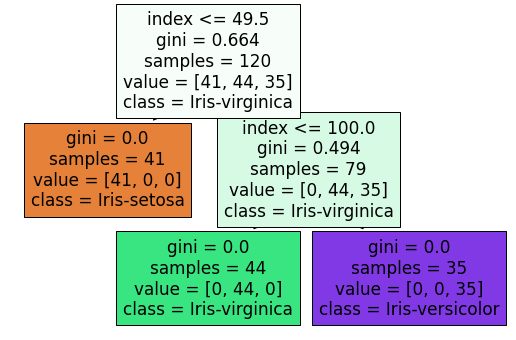

In [ ]:
fig = plt.figure(figsize=(9,6))
_ = tree.plot_tree(DC,
                   feature_names=X_test.columns,
                   class_names=class_names,
                   filled=True)